# Network Science - UDD

## Three central network metrics


This notebook was prepared by **Yessica Herrera-Guzmán** for the Network Science course at Universidad del Desarrollo, which is taught by Cristian Candia-Vallejos. 

Notebook prepared based on the course curriculum and the original presentation by Prof. Albert-László Barabási from Northeastern University, with permission. 

Please note that this notebook is intended for educational purposes and is not intended for commercial use or distribution.

Happy coding!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import networkx as nx

In [2]:
file_path = "edgelist.txt"

In [3]:
g = nx.Graph()

In [4]:
with open(file_path, "r") as file:
    for line in file:
        # Split each line to extract the node pairs
        nodes = line.strip().split()
        if len(nodes) == 2:
            g.add_edge(nodes[0], nodes[1])

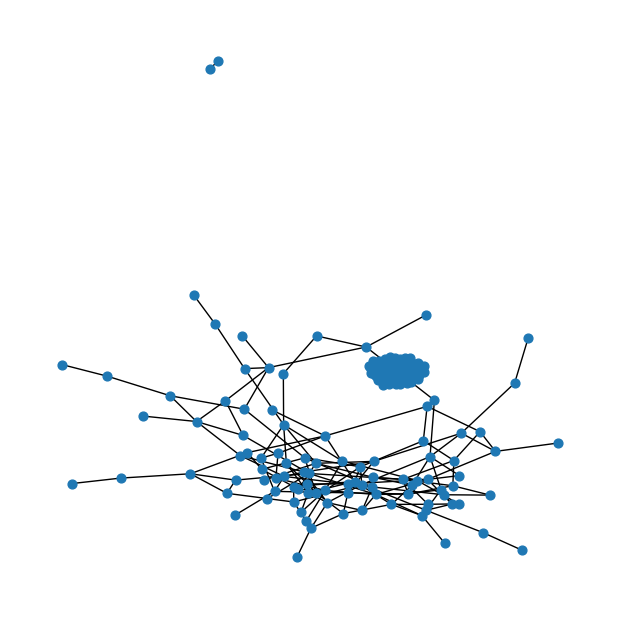

In [5]:
# Fruchterman-Reingold force-directed layout algorithm ~ default
fig = plt.figure(figsize=(6,6))
nx.draw(g, node_size=40)
# if you need labels to check nodes:
# nx.draw(g, node_size=40, with_labels=True)

# **Three basic properties**

In [6]:
N = len(g)
L = g.size()
degrees = list(dict(g.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [7]:
print("Number of nodes: ", N)
print("Number of links: ", L)
print('-------')
print("Average degree: ", 2*L/N) #Formula vista en clases (qué sucedía con las redes reales?)
print("Average degree (alternative estimation)", np.mean(degrees))
print('-------')
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  197
Number of links:  1651
-------
Average degree:  16.761421319796955
Average degree (alternative estimation) 16.761421319796955
-------
Minimum degree:  1
Maximum degree:  43


### **Degree distribution**

In [8]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# remember to make the histogram!
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

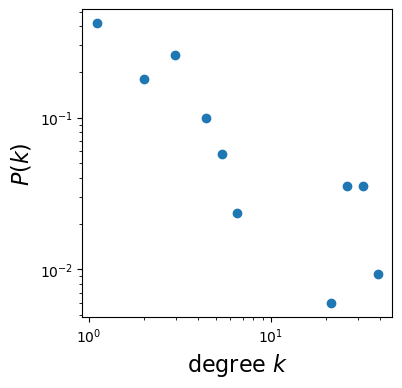

In [9]:
fig = plt.figure(figsize=(4,4))


log_be = np.log10(bin_edges) # log scale
x = 10**((log_be[1:] + log_be[:-1])/2) # (X_i+X_(i+1))/2



plt.loglog(x, density, marker='o', linestyle='none') 
# don't forget axis labels and right size!
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)



plt.show()

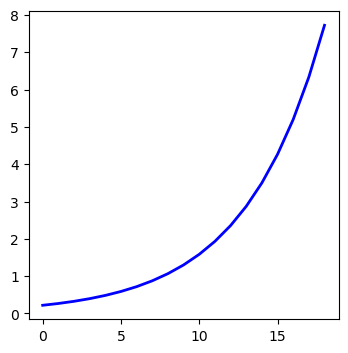

In [10]:
# Check binning
fig = plt.figure(figsize=(4,4))

a=bin_edges[1:] - bin_edges[:-1]

plt.plot(a, color='blue', lw=2)

plt.show()

### **Path length**

In [11]:
nx.average_shortest_path_length(g)

NetworkXError: Graph is not connected.

**Oh! Grapht is not connected!** 

How do we measure the average path length, then?

In [12]:
# Explore number of connected components
components = list(nx.connected_components(g))

In [13]:
largest_component = max(components, key=len)

In [14]:
# This is a subgraph of the largest connected component
lc_graph = g.subgraph(largest_component)

In [15]:
nx.average_shortest_path_length(lc_graph)

1.696969696969697

In [16]:
nx.diameter(lc_graph)

2

**Quick quizz:**

* How are the average shorthest path and diameter related? 

* What do they measure drom the network structure?

* How would the diameter change for a random network of N nodes, when changed to a tree-like structure?

* Compute the size of the largest connected component: number of nodes and edges respect to the entire network. 

### **Clustering coefficient**

In [17]:
clustering = nx.clustering(g)

In [18]:
clustering_values = list(clustering.values())

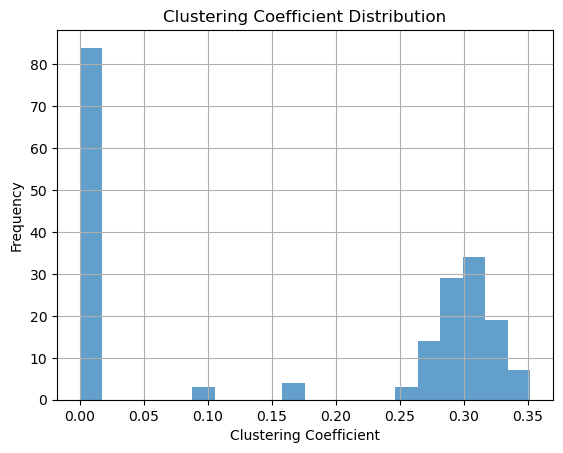

In [19]:
plt.hist(clustering_values, bins=20, alpha=0.7)
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Clustering Coefficient Distribution")
plt.grid(True)

# Show the histogram
plt.show()

Note that nx.clustering(g) provides the clustering for each node. So you can explore what is the clustering coefficient of specific nodes, for example:

In [20]:
node_id = '87'
cc_node = nx.clustering(g, node_id)
print(f"Clustering coefficient for Node {node_id}: {cc_node}")

Clustering coefficient for Node 87: 0.16666666666666666


Now we know the distribution of the clustering coefficient, let's compute the average clustering coefficient:

In [21]:
average_cc = nx.average_clustering(g)
print(f"The average clustering coefficient of this network is {average_cc}")

The average clustering coefficient of this network is 0.1682917533972737


Lastly, let's compute network density:

In [22]:
density = nx.density(g)
print(f"The density of this network is {density}")

The density of this network is 0.08551745571324977


**Quick quizz:**

* What is the meaning of a high clustering coefficient? 

* What is the meaning of a low clustering coefficient? 

* How is the density of a networ related to clustering coefficient? 

* How does the average clustering coefficient varies by each network model: random, BA, and WS? 

* What insights could you obtain about a network by only knowing that its average clustering coefficient is 0.46 and it has a 30\% of random edges?

* Lastly, describe what is the usefulness of the three network metrics for network analysis. 

## **Network properties of different networks**

**Erdos-Renyi random graph**

In [23]:
num_nodes = 200

In [24]:
# Probability of edge creation (adjust and have fun learning!)
probability = 0.2

In [25]:
er = nx.erdos_renyi_graph(num_nodes, probability)

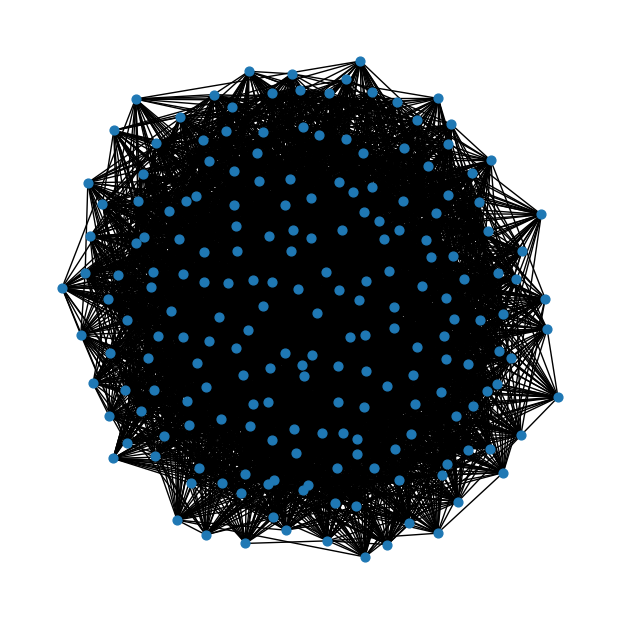

In [26]:
fig = plt.figure(figsize=(6,6))
nx.draw(er, node_size=40)

**Watts-Strogatz small-world graph**

In [27]:
num_nodes = 200

In [28]:
# Number of nearest neighbors to connect
k = 4

In [38]:
# Probability of rewiring each edge
p = 0.2

In [39]:
ws = nx.watts_strogatz_graph(num_nodes, k, p)

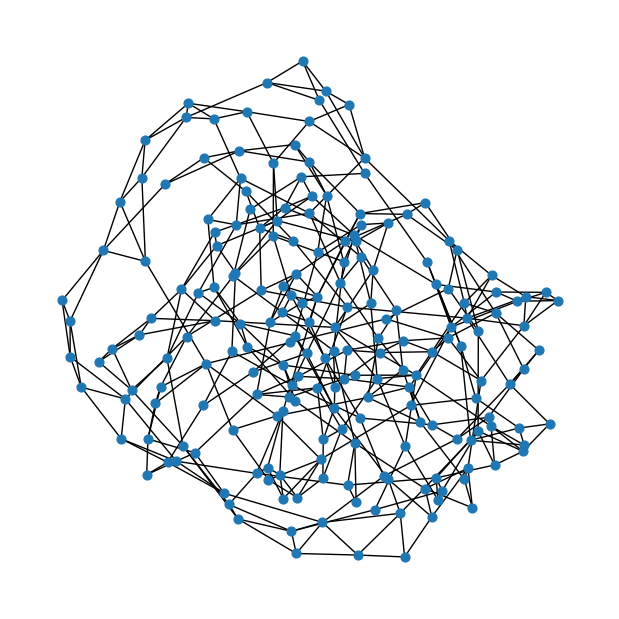

In [40]:
fig = plt.figure(figsize=(6,6))
nx.draw(ws, node_size=40)

**Barabási-Albert graph**

In [32]:
num_nodes = 200

In [33]:
# Number of edges to attach from a new node to existing nodes ~ Hubs!
m = 3

In [34]:
ab = nx.barabasi_albert_graph(num_nodes, m)

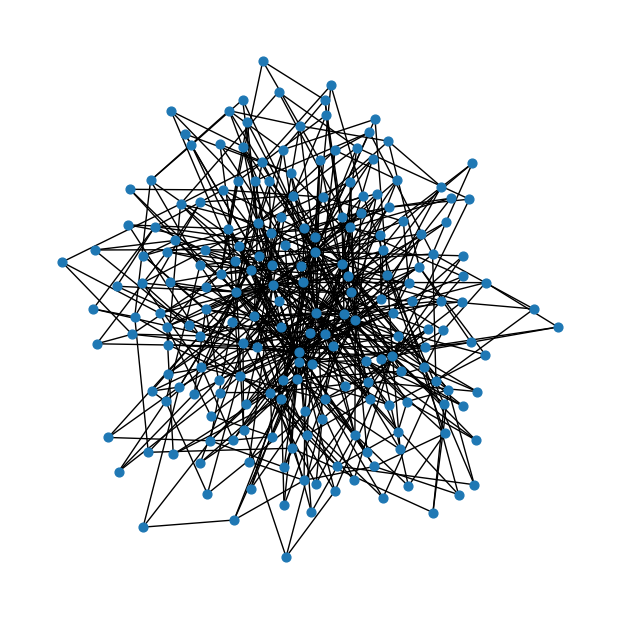

In [35]:
fig = plt.figure(figsize=(6,6))
nx.draw(ab, node_size=40)

# Moving on: 

* Compute the network properties studied here for each of these networks. 

* Make a visual exploration of the networks and check how structural features relate to the values obtained from the metrics. 

* Describe whether the three central metrics can be characteristic of each network model. 

* Discuss the limitations of the metrics and what other metrics could be computed to understand the network and nodes' relationships in more detail. 